# Hello world to mechine learning - MNIST MLP



## step1. 匯入模組
目前先匯入處理資料的模組
mnist 路徑: ~/.keras/datasets/mnist.npz (numpy file)

In [1]:
import numpy as np
import pandas as pd
import keras.utils as np_utils  # this is use to transfer label into one-hot-encoding
from keras.datasets import mnist

Using TensorFlow backend.


## step2. 匯入資料

另外把資料印出來看看內容

In [2]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)

(60000, 28, 28)


可視化圖形結果

<Figure size 432x288 with 0 Axes>

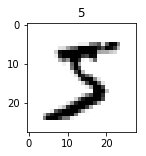

In [9]:
import matplotlib.pyplot as plt

def printimage(image,title_of_image):
    plt.figure()
    plt.figure(figsize=(2,2))
    plt.imshow(image,cmap='binary')
    plt.title(title_of_image)
    plt.show()
    
printimage(x_train[0], y_train[0]) 